## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [51]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [52]:
# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_47.csv')
Total_test = pd.read_csv('../data/Total_test_dataset_47.csv')

In [53]:
# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_47.csv')

# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']




### 인코딩 

In [55]:
Total_categorical_columns = [
    "시술_당시_나이",
    "난자_기증자_나이",
    "정자_기증자_나이"
]

In [56]:
# 모든 범주형 변수를 문자열로 변환
Total_X[Total_categorical_columns] = Total_X[Total_categorical_columns].astype(str)
Total_test[Total_categorical_columns] = Total_test[Total_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
Total_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Total_X[Total_categorical_columns] = Total_encoder.fit_transform(Total_X[Total_categorical_columns])
Total_test[Total_categorical_columns] = Total_encoder.transform(Total_test[Total_categorical_columns])

## Modeling

In [57]:
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분할
Total_X_train, Total_X_test, Total_y_train, Total_y_test = train_test_split(Total_X, Total_y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
Total_X_train = scaler.fit_transform(Total_X_train)
Total_X_test = scaler.transform(Total_X_test)


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 신경망 모델 정의
class NeuralNetTorch(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetTorch, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# 데이터셋 준비
train_dataset = TensorDataset(torch.FloatTensor(Total_X_train), torch.FloatTensor(Total_y_train.values))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [60]:
# 모델 초기화
input_size = Total_X_train.shape[1]
model = NeuralNetTorch(input_size)

# 손실 함수와 옵티마이저 정의
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.6687
Epoch [20/100], Loss: 0.4252
Epoch [30/100], Loss: 0.5413
Epoch [40/100], Loss: 0.4244
Epoch [50/100], Loss: 0.3148
Epoch [60/100], Loss: 0.3996
Epoch [70/100], Loss: 0.4456
Epoch [80/100], Loss: 0.5184
Epoch [90/100], Loss: 0.3364
Epoch [100/100], Loss: 0.7134


In [61]:
from sklearn.metrics import roc_auc_score

# 테스트 데이터셋 준비
with torch.no_grad():
    model.eval()
    test_tensor = torch.FloatTensor(Total_X_test)
    test_outputs = model(test_tensor).squeeze()
    test_predictions = (test_outputs.numpy() > 0.5).astype(int)
    auc = roc_auc_score(Total_y_test, test_outputs.numpy())

print(f'Test AUC: {auc:.4f}')


Test AUC: 0.7263


In [ ]:
# 데이터 분할
Total_X_train, Total_X_test, Total_y_train, Total_y_test = train_test_split(Total_X,Total_y,test_size=0.2,random_state=42)

### Total 데이터


--- Model Performance ---
Model Accuracy: 0.744445961497201
Model F1 Score: 0.19826214661608124
Model AUC: 0.7382621361232027


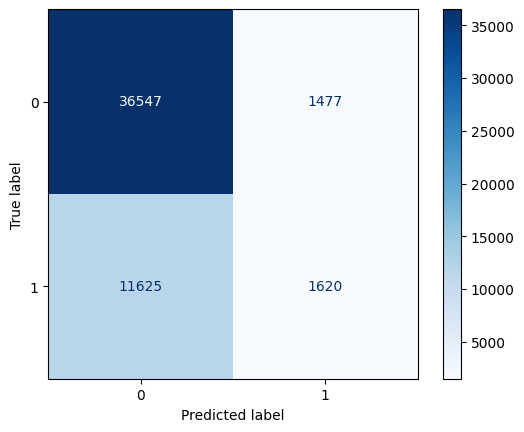

In [9]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
Total_model = lgb.LGBMClassifier(
    n_estimators=7655,  # 트리의 개수 (부스팅 반복 횟수)
    num_leaves=2855,  # 하나의 트리가 가질 수 있는 최대 리프 노드 수
    max_depth=5,  # 트리의 최대 깊이
    learning_rate=0.16281911161693016,  # 학습률 (0과 1 사이의 값)
    min_child_samples=460,  # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    subsample=0.38886888090131794,  # 각 트리를 학습할 때 사용하는 데이터 샘플링 비율
    reg_alpha=36.93967560025368,  # L1 정규화 (Lasso) 계수
    reg_lambda=96.03211423886586,  # L2 정규화 (Ridge) 계수

    metric='auc',  # 모델 성능 평가 지표
    objective='binary',  # 손실 함수 (이진 분류인 경우 'binary' 또는 'cross_entropy' 사용)
    random_state=42,  # 랜덤 시드 값 (재현성을 위해 설정)
    boosting_type='gbdt',  # 부스팅 유형 ('gbdt', 'dart', 'goss', 'rf' 중 하나)
    verbose=-1  # 학습 과정의 출력을 제어 (음수이면 출력을 억제)
)

# 모델 학습
Total_model.fit(Total_X_train, Total_y_train)

# 예측
y_pred = Total_model.predict(Total_X_test)
y_pred_proba = Total_model.predict_proba(Total_X_test)[:, 1]

# 평가
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_proba)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Total_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

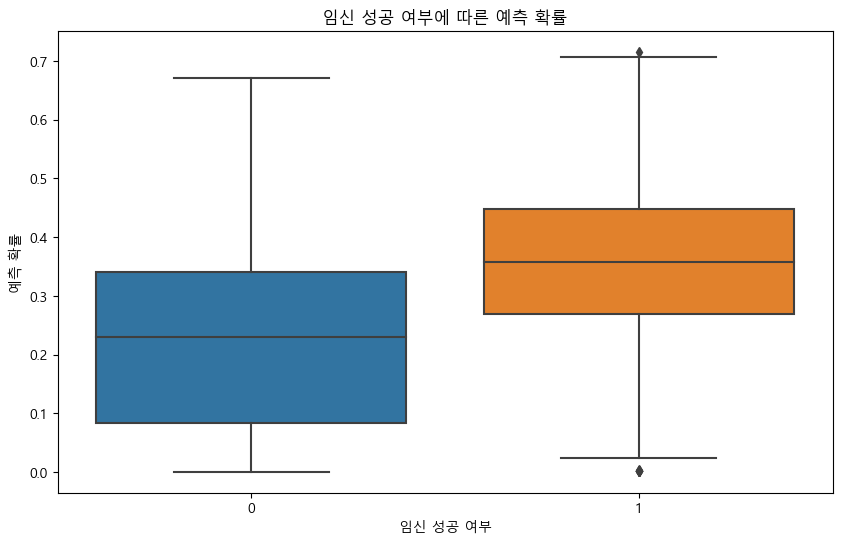

In [10]:
import platform
from matplotlib import rc

# 운영 체제에 따라 폰트 설정
if platform.system() == 'Windows':  # Windows 환경
    rc('font', family='Malgun Gothic')  # 맑은 고딕

# 음수 표시 가능하도록 설정
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# y_pred_proba를 임신_성공_여부에 따라 박스플롯으로 출력
result_df = pd.DataFrame({'임신_성공_여부': Total_y_test, '예측_확률': y_pred_proba})

# 박스플롯 출력
plt.figure(figsize=(10, 6))
sns.boxplot(x='임신_성공_여부', y='예측_확률', data=result_df)
plt.title('임신 성공 여부에 따른 예측 확률')
plt.xlabel('임신 성공 여부')
plt.ylabel('예측 확률')
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score

# CatBoost 모델 학습
Total_model.fit(Total_X_train, Total_y_train)

# 예측 확률
y_pred_proba = Total_model.predict_proba(Total_X_test)[:, 1]

# Platt Scaling을 통한 보정
platt_model = LogisticRegression()
platt_model.fit(y_pred_proba.reshape(-1, 1), Total_y_test)
y_pred_proba_calibrated = platt_model.predict_proba(y_pred_proba.reshape(-1, 1))[:, 1]

# AUC 평가
auc_calibrated = roc_auc_score(Total_y_test, y_pred_proba_calibrated)
print(f"Calibrated Model AUC (Platt Scaling): {auc_calibrated}")


Calibrated Model AUC (Platt Scaling): 0.7382621361232027


In [ ]:
from sklearn.calibration import IsotonicRegression

# CatBoost 모델 학습
Total_model.fit(Total_X_train, Total_y_train)

# 예측 확률
y_pred_proba = Total_model.predict_proba(Total_X_test)[:, 1]

# Isotonic Regression을 통한 보정
isotonic_model = IsotonicRegression(out_of_bounds='clip')
y_pred_proba_calibrated = isotonic_model.fit_transform(y_pred_proba, Total_y_test)

# AUC 평가
auc_calibrated = roc_auc_score(Total_y_test, y_pred_proba_calibrated)
print(f"Calibrated Model AUC (Isotonic Regression): {auc_calibrated}")


Calibrated Model AUC (Isotonic Regression): 0.7390597637287275


데이콘 PUBLIC xx

## 제출

In [9]:
# 모델 학습 및 예측
Total_model.fit(Total_X, Total_y)
Total_pred_proba = Total_model.predict_proba(Total_test.drop('ID', axis=1))[:, 1]
Total_test['probability'] = Total_pred_proba

# 최종 제출 파일 생성
submission = Total_test[['ID', 'probability']]
submission = submission.sort_values(by='ID')

In [ ]:
# 제출 파일 저장
submission.to_csv('../submission/code43_all_lgbm.csv', index=False, encoding='utf-8')

----

.